# Reproduction of Spielman et al.’s 2020 Evaluation of the Social Vulnerability Index
### Authors

- Liam Smith\*, lwsmith@middlebury.edu, @Liam-W-Smith, Middlebury College
- Joseph Holler, josephh@middlebury.edu , @josephholler, [ORCID link](https://orcid.org/0000-0002-2381-2699), Middlebury College

\* Corresponding author and creator

Version 1.1 | Created 2023-07-12 | Last Updated 2023-07-21  

### Abstract

This study is a *reproduction* of:

> Spielman, S. E., Tuccillo, J., Folch, D. C., Schweikert, A., Davies, R., Wood, N., & Tate, E. (2020). Evaluating Social Vulnerability Indicators: Criteria and their Application to the Social Vulnerability Index. Natural Hazards, 100(1), 417–436. https://doi.org/10.1007/s11069-019-03820-z

The Spielman et al. (2020) paper is in turn a replication of:

> Cutter, S. L., Boruff, B. J., & Shirley, W. L. (2003). Social vulnerability to environmental hazards. Social Science Quarterly, 84(2), 242–261. https://doi.org/10.1111/1540-6237.8402002

Spielman et al. (2020) developed methods to evaluate the internal consistency and construct validity of the Cutter, Boruff and Shirley (2003) Social Vulnerability Index (SoVI).
First, they reproduce a national SoVI model and validate it against an SPSS procedure provided by the original research group (Hazards Vulnerability Research Institute at University of South Carolina).
The original SoVI uses 42 independent z-score normalized variables from the U.S. Census, reduces the data to factors using Principal Components Analysis, selects the first eleven factors, inverts factors with inverse relationships to social vulnerability, and sums the factors together to produce a SoVI score.
The reproduced SoVI model was slightly different than the original model due to changes in U.S. Census data, using only 28 variables.

Spielman et al. modify the geographic extent of the SoVI calculation by calculating SoVI on a national extent, and then recalculating for each of ten Federal Emergency Management Agency (FEMA) regions, and again for a single state or cluster of states within each of the ten regions, resulting in 21 total indices.
Internal consistency is assessed by calculating the spearman rank correlation coefficient of the SoVI score for counties in the state model compared to the FEMA region model and national model.
Construct validity is assessed by summing the loadings for each input variable across the PCA factors in each model and calculating the variables sign (positive/negative) and the rank of the variable's total loading compared to the other variables.
These signs and ranks are summarized across all 21 versions of the SoVI model with regard to the number of times the sign is different from the national model and the distributions of ranks.

In this reproduction study, we attempt to reproduce identical SoVI model outputs for each of the 21 models in the original study.
We will compare these outputs to data files in Spielman et al.'s GitHub repository.
We will also attempt to reproduce identical results of internal consistency analysis (figure 1 and table 2) and construct validity analysis (figure 2) from Spielman et al.'s paper.
We succeed in reproducing identical SoVI model outputs, but find slight discrepancies in our figures and tables.

The code in this Jupyter notebook report is adapted from Spielman et al.'s GitHub repository.
The original study states the intended open source permissions in the acknowledgements: "To facilitate advances to current practice and to allow replication of our results, all of the code and data used in this analysis is open source and available at (https://github.com/geoss/sovi-validity).
Funding was provided by the US National Science Foundation (Award No. 1333271) and the U.S. Geological Survey Land Change Science Program."

### Keywords

Social vulnerability, social indicators, Principal Component Analysis, reproducibility

## Study design

We computationally reproduce Spielman et al.'s original work using the code provided in their Github repository (https://github.com/geoss/sovi-validity), adapting their code to run in an updated Python environment using current package versions.
We make all of our work available online using the HEGSRR [reproducible research compendium template](https://github.com/HEGSRR/HEGSRR-Template).

The original paper was a replication study testing the sensitivity of SoVI to changes in geographic extent.
Spielman et al. addressed the following hypotheses in their work:

> OR-H1: SoVI is internally inconsistent.

To address this hypothesis, Spielman et al. illustrated that SoVI is not robust to changes in geographic extent by calculating SoVI scores for ten selected states or groups of states on three geographic extents: national, FEMA region, and state(s).
The counties within the state(s) of interest were then selected and ranked according to their SoVI score.
OR-H1 was tested by calculating Spearman's rank correlation between the state and FEMA region models and between the state and national models.

> OR-H2: SoVI is theoretically inconsistent.

To address this hypothesis, Spielman et al. used the same SoVI models as described under OR-H1.
For each model, they summed all of the PCA factors together to determine the net influence of each variable in each model.
Then they recorded the signs of each variable and calculated the number of deviations of the ten state and FEMA region models from the national model.
They also ranked the variables by absolute value for each model and calculated summary statistics regarding the distribution of ranks for each variable amongst all models.
Spielman et al. did not use a particular statistical method to test OR-H2, but illustrated substantial disagreements between variable rankings and signs amongst the 21 SoVI models.

For our reproduction, we address the following three hypotheses:

> RPr-H1: Reproduced SoVI model scores and other reproduced output datasets are not identical to the original study SoVI model scores and provided output datasets for each of the 21 SoVI models.

> RPr-H2: Reproduced figures and tables for the internal consistency analysis are not identical to the figures and tables (figure 1 and table 2) of the original study.

> RPr-H3: For the theoretical consistency analysis, reproduced direction reversals and min, average, and max SoVI rank value of 28 demographic variables are not identical to the direction reversals and min, average, and max SoVI rank values shown in figure 2 of the original study.


We answer these questions by working through Spielman et al.'s code line by line in an updated python coding environment.
To improve reproducibility, we reorganize Spielman's repository into the Template for Reproducible and Replicable Research in Human-Environment and Geographical Sciences (doi:10.17605/OSF.IO/W29MQ) and use one Jupyter notebook for the reproduction report and code.
We catalogue barriers to reproducibility and make improvements wherever possible.

Disclaimer: we worked with the data and code before writing this report, so there is no pre-registration of the analysis plan.
We originally intended to publish only a replication of this study; we did not anticipate publishing a reproduction until we spent some time working with the code.

#### Spatio-temporal metadata

- `Spatial Coverage`: United States, excluding Puerto Rico
- `Spatial Resolution`: Counties and county equivalents
- `Spatial Reference System`: EPSG:4269
- `Temporal Coverage`: 2008 - 2012 (data is the 2012 5-year ACS)
- `Temporal Resolution`: One-time measurement, does not address change over time

## Materials and procedure

### Computational environment

Currently, we are using a [2020 MacBook Pro](https://support.apple.com/kb/SP818?locale=en_US) running on macOS Ventura 13.3.1.
We anticipate collaborators working on the project from different computers and different operating systems, and we seek to containerize the project so that scripts can be run on many different machines.

The original study used Python for their analysis, so we reproduce their results in Python, using a containerized conda environment.
This environment consists of Python 3.9.16 and the software packages listed in [requirements.txt](../environment/requirements.txt)

To set up this environment on another machine, one should install the correct version of Python and run the cell below to install the correct package versions.
If a user wishes to create a self-contained environment, they should explore [venv](https://docs.python.org/3/library/venv.html), [conda](https://docs.conda.io/en/latest/), or [pipenv](https://pipenv.pypa.io/en/latest/) virtual environments.

In [1]:
# report python version and install required packages
# switch if statement from True to False once packages have been installed
if True:
    !python -V
    !pip install -r ../environment/requirements.txt

Python 3.9.18


In [2]:
# Import modules, define directories
import pygris
import pandas as pd
import geopandas as gpd
from pygris.data import get_census
from pygris import counties
from pyhere import here
import numpy as np
import libpysal as lps
import lxml
import tabulate
from scipy.stats import spearmanr
from scipy.stats.mstats import zscore as ZSCORE
from scipy.stats import rankdata
import mdp as MDP
from operator import itemgetter
import copy
from matplotlib.colors import ListedColormap
from matplotlib import patheffects as pe
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import Markdown, Latex

pd.set_option("chained_assignment", None)

path = {
    "dscr": here("data", "scratch"),
    "drpub": here("data", "raw", "public", "spielman", "input"),
    "drpub2": here("data", "raw", "public"),
    "drpriv": here("data", "raw", "private"),
    "ddpub": here("data", "derived", "public", "version1"),
    "ddpriv": here("data", "derived", "private"),
    "rfig": here("results", "figures"),
    "roth": here("results", "other"),
    "rtab": here("results", "tables"),
    "og_out": here("data", "raw", "public", "spielman", "output"),
    "dmet": here("data", "metadata")
}

In [3]:
# Switch from False to True to regenerate documentation of computational environment
# Note that this approach is not perfect -- it may miss some packages
# This code may work better from the command prompt
if False:
    !pip install pigar
    !pigar generate -f ../environment/requirements.txt

### Data and variables

For Spielman et al.'s original study, the data sources were the 2008-2012 5-year American Community Survey and the 2010 decennial census.
Spielman et al. downloaded their data from Social Explorer; in our reproduction, we pull our data directly from the census into Python via a census API package known as pygris.
These variables are based on the original work by Cutter et al. to create SoVI, and cover a wide range of social and demographic information, the particulars of which are described below.

In order to confirm that our data and Spielman et al.'s data perfectly match each other, we import the names of relevant variables from both datasets here.

In [4]:
# Import data dictionary
acs_vars = pd.read_csv( here("data", "metadata", "ACS_2012_data_dictionary.csv") )
acs_vars.drop(columns=acs_vars.columns[0], axis=1, inplace=True)

acs_variables = list(acs_vars['Reproduction Label'][1:])
spielman_acs_variables = list(acs_vars['Spielman Label'][1:])

#### (1) 2008-2012 American Community Survey (5-year)
Used in both original study and reproduction.

**Planned deviation:** to enhance reproducibility, we draw the data directly from the census into python using the pygris package. 

In [5]:
# Switch from False to True to download fresh data from the Census
if False:
    # Acquire attribute data for reproduction 
    counties_detailed = get_census(dataset = "acs/acs5", # dataset name on the Census API you are connecting to; find datasets at https://api.census.gov/data.html
                            variables = acs_variables, # string (or list of strings) of desired vars. For the 2021 5-year ACS Data Profile, those variable IDs are found at https://api.census.gov/data/2021/acs/acs5/profile/variables.html
                            year = 2012, # year of your data (or end-year for a 5-year ACS sample)
                            params = { # dict of query parameters to send to the API.
                              "for": "county:*"},
                            guess_dtypes = True,
                            return_geoid = True)

    # Drop Puerto Rico
    counties_detailed = counties_detailed.loc[~counties_detailed['GEOID'].str.startswith('72')]

    # Download and save raw data
    counties_detailed.to_csv( here(path["drpub2"], "counties_attributes_raw.csv"))
else:
    counties_detailed = pd.read_csv( here(path["drpub2"], "counties_attributes_raw.csv"), dtype = {'GEOID': object} )
    counties_detailed = counties_detailed.drop(counties_detailed.columns[0],axis=1)

Load data from Spielman et al.'s research repository for validation of the reproduction study.

In [6]:
# Import original data from Spielman et al.

# Import base ACS data
make_strings = {'Geo_FIPS': object, 'Geo_STATE': object, 'Geo_COUNTY': object,
                'Geo_TRACT': object, 'Geo_CBSA': object, 'Geo_CSA': object}

acs = pd.read_csv(here(path["drpub"], 'sovi_acs.csv'),
                  dtype=make_strings, skiprows=1,encoding='latin-1')

# Import, join an ACS supplemental
acs_sup2 = pd.read_csv(here(path["drpub"], 'sovi_acs_kids.csv'),
                           dtype=make_strings, skiprows=1,encoding='latin-1')

acs = acs.merge(acs_sup2, how = "inner", on='Geo_FIPS')

# Drop Puerto Rico
acs = acs[acs.Geo_STATE_x != '72'] 

In [7]:
Markdown( here(path["dmet"], "ACS_2012_geographic_metadata.md") )

- `Title`: American Community Survey 2012 5-year Estimate Demographic Variables
- `Abstract`: The 5-year ACS provides estimates surrounding demographic information in the USA. These estimates are more reliable than 1-year and 3-year estimates but less reliable than decennial census data. On the other hand, 5-year estimates are less current than 1-year and 3-year estimates because they represent measurements taken over 60 months. See the [census website](https://www.census.gov/programs-surveys/acs/guidance/estimates.html) for more details.
- `Spatial Coverage`: United States, excluding Puerto Rico
- `Spatial Resolution`: County and county-equivalents
- `Spatial Reference System`: None, just attribute data
- `Temporal Coverage`: 2008-2012
- `Temporal Resolution`: Data averaged over five years
- `Lineage`: Original data downloaded from Social Explorer and then placed in the original study's GitHub repository: https://github.com/geoss/sovi-validity. Reproduction data obtained directly from the census via API.
- `Distribution`: The reproduction data is distributed via a census API. See the detailed tables on the [census website](https://www.census.gov/data/developers/data-sets/acs-5year/2012.html) and instructions for drawing census data directly into python on the [pygris website](https://walker-data.com/pygris/). Spielman et al. originally accessed the ACS data with Social Explorer from the following two tables.
  - http://www.socialexplorer.com/pub/reportdata/HtmlResults.aspx?reportid=R10728365
  - http://www.socialexplorer.com/pub/reportdata/HtmlResults.aspx?reportid=R10775556
- `Constraints`: Census data is available in the public domain
- `Data Quality`: Margin of error provided by the Census Bureau for relevant variables
- `Variables`:  See ACS_2012_data_dictionary.csv


In [8]:
acs_vars

,Reproduction Label,Spielman Label,Alias,Definition,Type,Domain,Missing Data Value(s),Missing Data Frequency
0,GEOID,Geo_FIPS,FIPS code unique identifier,Unique code for every county and county-equiva...,string,01001 - 56045,None,0.0
1,B01002_001E,ACS12_5yr_B01002001,median age,MEDIAN AGE BY SEX: Estimate!!Median age!!Total,float64,21.7 - 63,NaN,0.0
2,B03002_001E,ACS12_5yr_B03002001,total population of respondents to race/ethnicity,HISPANIC OR LATINO ORIGIN BY RACE: Estimate!!T...,int64,66 - 9840024,NaN,0.0
3,B03002_004E,ACS12_5yr_B03002004,total Black population,HISPANIC OR LATINO ORIGIN BY RACE: Estimate!!T...,int64,0 - 1267825,NaN,0.0
4,B03002_005E,ACS12_5yr_B03002005,total Native American population,HISPANIC OR LATINO ORIGIN BY RACE: Estimate!!T...,int64,0 - 59060,NaN,0.0
5,B03002_006E,ACS12_5yr_B03002006,total Asian population,HISPANIC OR LATINO ORIGIN BY RACE: Estimate!!T...,int64,0 - 1343920,NaN,0.0
6,B03002_012E,ACS12_5yr_B03002012,total Latinx population,HISPANIC OR LATINO ORIGIN BY RACE: Estimate!!T...,int64,0 - 4694846,NaN,0.0
7,B06001_002E,ACS12_5yr_B06001002,total population under 5 years of age,PLACE OF BIRTH BY AGE IN THE UNITED STATES: Es...,float64,0 - 651662,NaN,78.0
8,B09020_001E,ACS12_5yr_B09020001,total population over 65 years of age,RELATIONSHIP BY HOUSEHOLD TYPE (INCLUDING LIVI...,int64,5 - 1078555,NaN,0.0
9,B01003_001E,ACS12_5yr_B01003001,total population,TOTAL POPULATION: Estimate!!Total,int64,66 - 9840024,NaN,0.0


The above are the metadata files that we wrote for our pygris-acquired version of this data, stored as ACS_2012_data_dictionary.csv and ACS_2012_geographic_metadata.md. 
The metadata files provided by Spielman et al. are also in our repository, named sovi_acs.txt and sovi_acs_kids.txt.

#### (2) 2010 Decennial Census
Used in Spielman et al.'s original study.

In [9]:
# Import decennial supplemental
dec_sup1 = pd.read_csv(here(path["drpub"],'sovi_decennial_sup1.csv'),
        dtype=make_strings,skiprows=1,encoding='latin-1')

In [10]:
Markdown( here(path["dmet"], "dec_2010_metadata.md") )

- `Title`: 2010 Decennial Census
- `Abstract`: Collected once every ten years, the decennial census documents demographic and population data in the United States.
- `Spatial Coverage`: United States, excluding Puerto Rico
- `Spatial Resolution`: County and county-equivalents
- `Spatial Reference System`: None, just attribute data
- `Temporal Coverage`: 2010
- `Temporal Resolution`: One-time observations
- `Lineage`: Original data downloaded from Social Explorer and then placed in the original study's GitHub repository: https://github.com/geoss/sovi-validity.
- `Distribution`: Visit [this URL](http://www.socialexplorer.com/pub/reportdata/HtmlResults.aspx?reportid=R10728369) for access
- `Constraints`: Census data is available in the public domain
- `Data Quality`: Margin of error provided by the Census Bureau for relevant variables
- `Variables`:

| Label | Alias | Definition | Type | Accuracy | Domain | Missing Data Value(s) | Missing Data Frequency |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| SE_T02A_002 | Land area | Area (Land) in square miles | float64 |  ... | 1.998779 - 145504.8 | nan | 0 |
| Geo_FIPS | FIPS code unique identifier | Unique code for every county and county-equivalent in USA | string | ... | g01001 - g56045 | None | 0 |


Original metadata file provided by Spielman et al. as sovi_decennial_sup1.txt.

#### (3) USA Counties Shapefile
Used in Spielman et al.'s original study

In [11]:
spielman_geom = gpd.read_file( here(path["drpub"], "USA_Counties_500k.shp") )

In [12]:
Markdown( here(path["dmet"], 'USA_counties_metadata.md') )

- `Title`: USA Counties Geographic Shapefile
- `Abstract`: No metadata provided, so it is unclear exactly where Spielman et al. acquired this file but they likely downloaded it directly or indirectly from the census. The shapefile provides the geometries of counties and county-equivalents in the United States, with limited attribute information including county name and a unique identifier.
- `Spatial Coverage`: United States, excluding Puerto Rico
- `Spatial Resolution`: County and county-equivalents
- `Spatial Reference System`: EPSG:4269
- `Temporal Coverage`: Unknown
- `Temporal Resolution`: One-time observations
- `Lineage`: Unknown
- `Distribution`: Unknown. Presumably downloaded from census.
- `Constraints`: Census data is available in the public domain
- `Data Quality`: 1:500,000 scale
- `Variables`: For each variable, enter the following information. If you have two or more variables per data source, you may want to present this information in table form (shown below)

| Label | Alias | Definition | Type | Accuracy | Domain | Missing Data Value(s) | Missing Data Frequency |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| geoFIPS | FIPS code unique identifer | Unique code for every county and county-equivalent in USA | string | ... | g01001 - g56045 | None | 0 |


No original metadata file provided.

#### (4) USA Counties Cartographic Boundaries

Used in reproduction study.

**Planned deviation:** to enhance reproducibility, we draw the data directly from the census into python using the pygris package. 



In [13]:
# Switch False to True if you wish to acquire data directly from census
if False:
    # Acquire geographical data for reproduction
    counties_shp = counties(cb = True, year = 2010, cache = True) # year 2012 (and 2011) cartographic boundaries not available

    # Save raw data
    counties_shp.to_file( here(path["drpub2"], "counties_geometries_raw.gpkg") )
else:
    counties_shp = gpd.read_file( here(path["drpub2"], "counties_geometries_raw.gpkg") )

In [14]:
Markdown( here(path["dmet"], "county_geom_2010_metadata.md") )

- `Title`: USA Counties Cartographic Boundaries
- `Abstract`: The cartographic boundary files provided by the US census are simplified representations of the MAF/TIGER files. We use the 2010 boundary file because the census has not made such a file available for 2012 or 2011 and the original paper also used land area from 2010. This shapefile provides the geometries of counties and county-equivalents in the United States, with limited attribute information including land area.
- `Spatial Coverage`: United States, excluding Puerto Rico
- `Spatial Resolution`: County and county-equivalents
- `Spatial Reference System`: EPSG:4269
- `Temporal Coverage`: 2010
- `Temporal Resolution`: One-time observations
- `Lineage`: We use [pygris](https://walker-data.com/pygris/) to pull the data directly from the census into python.
- `Distribution`: This file is distributed via a census API. See more information on the [census website](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2010.html#list-tab-1556094155) and instructions for drawing census data directly into python on the [pygris website](https://walker-data.com/pygris/).
- `Constraints`: Census data is available in the public domain
- `Data Quality`: 1:500,000 scale
- `Variables`:

| Label | Alias | Definition | Type | Domain | Missing Data Value(s) | Missing Data Frequency |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| STATE | State-level FIPS code | State-level FIPS code | string | 01 - 56 | None | 0 |
| COUNTY | County-level FIPS code | County-level FIPS code | string | 001 - 840 | None | 0 |
| CENSUSAREA | land area | land area in square miles | float64 | 1.999 - 145504.789 | NaN | 0 |


The metadata file for this data is stored as county_geom_2010_metadata.md.

### Data transformations
A workflow diagram for this section is displayed below.

![Data Preparation Workflow](../../results/figures/workflow_data_transformations.png)

We begin with step P1: joining the geometry and attribute data

In [15]:
# Step P1
# Join geometry and attribute data for reproduction 
counties_shp['GEOID'] = counties_shp.STATE + counties_shp.COUNTY
counties = counties_shp.merge(counties_detailed, how = "inner", on = "GEOID")

# Also join Spielman's land area information to the rest of Spielman's data
# (to check that all data is accurate, not for purposes of analysis)
acs = acs.merge(dec_sup1, how = "inner", on='Geo_FIPS')

**Planned deviation:** Because we decided to acquire our data independently from Spielman et al., we need to check that our data is indeed the same as theirs.

To begin, we define a function that can check that the entries of two pandas DataFrames are equal.

In [16]:
# Define a function that can determine whether every entry in specified columns of two tables match  
def equiv(table1, sort1, column1, table2, sort2, column2):
    ''' 
    Tests two tables to see whether corresponding columns have equivalent entries.
    
    Parameters:
    table1 - the first table
    sort1 - the column in the first table to join by (str)
    column1 - the column(s) in the first table to test the values of (list of str) (should list analogous columns for columns2) 
    table2 - the second table
    sort2 - the column in the second table to join by (str)
    column2 - the column(s) in the second table to test the values of (list of str)
    '''
    # Sort tables
    table1 = table1.sort_values(by = sort1).reset_index()
    table2 = table2.sort_values(by = sort2).reset_index()
    
    # Rename column name in table2 to match that in table1
    for i in range(len(column1)):
        table2 = table2.rename(columns={column2[i]: column1[i]})

    # Select the columns to test equivalency of
    table1 = table1[column1]
    table2 = table2[column1]
    
    # Perform equivalency test
    test = table1.eq(table2)
    return test

Next, we round our area columns to the nearest integer, just for the purposes of comparing the two columns. These columns came from different sources and we know that they do not match up exactly.

In [17]:
# # Round area column
# acs['SE_T02A_002_check'] = acs.SE_T02A_002.round(0)
# counties['CENSUSAREA_check'] = counties.CENSUSAREA.round(0)

# Add the area variables to the lists of variables
acs_variables.append('CENSUSAREA')
spielman_acs_variables.append('SE_T02A_002')

In [18]:
# Perform equivalency test
test = equiv(counties, "GEOID", acs_variables, acs, "Geo_FIPS", spielman_acs_variables)
matching_cols = pd.DataFrame({"test": test.sum().eq(3143)}) # 3143 matches the number of rows 
matching_cols.loc[~matching_cols.test] # Identify the columns that have some data discrepencies

,test
B25077_001E,False
CENSUSAREA,False


The following variables have some discrepancy between the original and reproduction data:
- B25077_001E
- CENSUSAREA

In [19]:
# Inspect the data values for B25077_001E at the indices with data discrepancies

# Find the rows for which there are data discrepancies
messed_up_indices = test[["B25077_001E"]].loc[~test.B25077_001E]

# Select the data of interest from tygris
tygris_data = counties.sort_values(by = "GEOID")\
    .reset_index().loc[messed_up_indices.index]\
    [["GEOID", "B25077_001E"]]

# Select the data of interest from Spielman et al.
spielman_data = acs.sort_values(by = "Geo_FIPS")\
    .reset_index().loc[messed_up_indices.index]\
    [["Geo_FIPS", "ACS12_5yr_B25077001"]]

# Join and inspect
merged = tygris_data.merge(spielman_data, how = "inner", left_on = "GEOID", right_on = "Geo_FIPS")
merged

,GEOID,B25077_001E,Geo_FIPS,ACS12_5yr_B25077001
0,15005,NaN,15005,NaN


By inspection, we see that the one disagreement between B25077_001E and ACS12_5yr_B25077001 occurs because of a NaN value in an analogous location in each of the two datasets. 
Rather than revealing an issue in matching our data, this shows us that we will need to impute a missing value for one NaN in B25077_001E -- median home value (see P3).

In [20]:
# Inspect the data values for CENSUSAREA at the indices with data discrepancies

# Find the rows for which there are data discrepancies
messed_up_indices = test[["CENSUSAREA"]].loc[~test.CENSUSAREA]

# Select the data of interest from tygris
tygris_data = counties.sort_values(by = "GEOID")\
    .reset_index().loc[messed_up_indices.index]\
    [["GEOID", "CENSUSAREA"]]

# Select the data of interest from Spielman et al.
spielman_data = acs.sort_values(by = "Geo_FIPS")\
    .reset_index().loc[messed_up_indices.index]\
    [["Geo_FIPS", "SE_T02A_002"]]

# Join and inspect
merged = tygris_data.merge(spielman_data, how = "inner", left_on = "GEOID", right_on = "Geo_FIPS")
merged

,GEOID,CENSUSAREA,Geo_FIPS,SE_T02A_002
0,01001,594.436,01001,594.4361
1,01005,884.876,01005,884.8763
2,01007,622.582,01007,622.5823
3,01009,644.776,01009,644.7759
4,01011,622.805,01011,622.8047
...,...,...,...,...
2285,55137,626.153,55137,626.1533
2286,55141,793.116,55141,793.1165
2287,56013,9183.814,56013,9183.8130
2288,56023,4076.129,56023,4076.1300


There are many disagreements between CENSUSAREA and SE_T02A_002, but they appear to be relatively minor differences. Let us evaluate how large those differences are.

In [21]:
merged["Difference"] = abs(merged["CENSUSAREA"] - merged["SE_T02A_002"])
print("Maximum difference:", merged['Difference'].max(), "\nAverage difference:", merged['Difference'].mean())

Maximum difference: 0.010999999998603016 
Average difference: 0.00031027379912322995


The largest discrepency between the two different sources of land area data is just over 0.01 square miles and the average difference (amongst those with a difference) is tiny. With such a minor difference between our data and theirs, for our purposes we will consider our data roughly the same as Spielman et al.'s.

In [22]:
# Step P2
# Calculating the variables used in SoVI
counties['MEDAGE_ACS'] = counties.B01002_001E
counties['BLACK_ACS'] = counties.B03002_004E / (counties.B03002_001E)
counties['QNATAM_ACS'] = counties.B03002_005E / (counties.B03002_001E)
counties['QASIAN_ACS'] = counties.B03002_006E / (counties.B03002_001E)
counties['QHISP_ACS'] = counties.B03002_012E / (counties.B03002_001E)
counties['QAGEDEP_ACS'] = (counties.B06001_002E + counties.B09020_001E) / (counties.B01003_001E)
counties['QPUNIT_ACS'] = counties.B25008_001E / (counties.B25002_002E)
counties['PRENTER_ACS'] = counties.B25003_003E / (counties.B25002_001E)
counties['QNRRES_ACS'] = counties.B09020_021E / (counties.B01003_001E)
counties['QFEMALE_ACS'] = counties.B01001_026E / (counties.B01003_001E)
counties['QFHH_ACS'] = counties.B11001_006E / (counties.B11001_001E)
counties['QUNOCCHU_ACS'] = counties.B25002_003E / (counties.B25002_001E)
counties['QCVLUN'] = (counties.B23022_025E + counties.B23022_049E) / \
                counties.B23022_001E
counties['QPOVTY'] = (counties.B17021_002E) / counties.B17021_001E
counties['QMOHO'] = (counties.B25024_010E) / counties.B25024_001E
counties['QFEMLBR'] = (counties.C24010_038E) / counties.C24010_001E
counties['QSSBEN'] = (counties.B19055_002E) / counties.B19055_001E
counties['QFAM'] = (counties.B09002_002E) / counties.B09002_001E
counties['QRICH200K'] = (counties.B19001_017E) / counties.B11001_001E
counties['PERCAP_ALT'] = counties.B19025_001E / (counties.B25008_001E)
counties['QESL_ALT'] = (counties.B06007_005E + counties.B06007_008E) / \
                  counties.B06007_001E
counties['QED12LES_ALT'] = (counties.B16010_002E) / counties.B16010_001E 
counties['QEXTRCT_ALT'] = (counties.C24050_002E) / counties.C24050_001E 
counties['QSERV_ALT'] = (counties.C24050_029E) / counties.C24050_001E 
counties['QNOAUTO_ALT'] = (counties.B08201_002E) / counties.B08201_001E 
counties['MDGRENT_ALT'] = counties.B25064_001E 
counties['MHSEVAL_ALT'] = counties.B25077_001E 
counties['POPDENS'] = counties.B01003_001E / (counties.CENSUSAREA)

As noted before, B25077_001E is missing a data value.
We now perform one final check to see if we need to impute anything else.

In [23]:
# Check for missing data
for i in counties.columns:
    x = counties[i].isnull().sum()
    if x > 0:
        print(i, "contains", x, "missing value(s).")
        
# Check for infinities
counties_num = counties.select_dtypes(include=['int64','float64'])
for i in counties_num.columns:
    xmin = counties_num[i].min()
    xmax = counties_num[i].max()
    if xmin == -np.inf:
        print(i, "contains a negative infinity")
    elif xmax == np.inf:
        print(i, "contains a positive infinity")

LSAD contains 2 missing value(s).
B25077_001E contains 1 missing value(s).
QFAM contains 2 missing value(s).
MHSEVAL_ALT contains 1 missing value(s).


There are four variables with missing data. LSAD is not used in our analysis, so we may ignore this. B25077_001E and MHSEVAL_ALT are literally identical, so we will ignore B25077_001E and simply impute for MHSEVAL_ALT's one missing value. We also need to impute for QFAM's 2 missing values. We use the same imputation decisions that Spielman et al. employ in their analysis.

**Unplanned deviation:** When imputing for MHSEVAL_ALT's missing data, we removed a fair amount of extraneous code that was filling in missing spatial lag data with original data for the county. This was unnecessary because we only needed to impute data for one county and that county had spatial lag data. Also note that Spielman et al.'s method for imputing data for MHSEVAL_ALT is a deviation from Cutter's original methodology, in which she imputed a 0 for any missing value. While this is a deviation from the original SoVI methodology, 0 is an unrealistic median home value, so Spielman et al.'s method for imputation seems like a reasonable improvement.

In [24]:
# Step P3
# Replace missing QFAM data with 0
counties.QFAM = counties.QFAM.replace([np.inf, -np.inf, np.nan], 0)

# Replace missing MHSEVAL_ALT data with its spatial lag

# Calculate spatial weights matrix
w = lps.weights.Queen.from_dataframe(counties) 
w.transform = 'R'
# Calculate spatial lag
counties['MHSEVAL_ALT_LAG'] = lps.weights.lag_spatial(w, counties.MHSEVAL_ALT)
# Impute for the missing value
counties.MHSEVAL_ALT[np.isnan(counties['MHSEVAL_ALT'])] = counties[["MHSEVAL_ALT_LAG"]][pd.isna(counties['MHSEVAL_ALT'])]

('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 546, ' is an island (no neighbors)')
('WARNING: ', 547, ' is an island (no neighbors)')
('WARNING: ', 549, ' is an island (no neighbors)')
('WARNING: ', 1226, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 2976, ' is an island (no neighbors)')


C:\Users\tsutter\.conda\envs\spielman\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
 There are 7 islands with ids: 68, 546, 547, 549, 1226, 1876, 2976.
  warnings.warn(message)


The missing data procedure attempts to fill some counties' missing data with the average values of the surrounding counties.
This procedure produces a warning about 10 disconnected components and 7 islands in the weights matrix.
The cause of this error is areas of the United States that are not contiguous with one another.
Fortunately, these areas are not missing any data, and therefore this error does not affect our procedure to fill gaps in missing data.

Before adjusting directionality, let us check that all of our derived variables match all of Spielman et al.'s derived variables.

In [25]:
# Import Spielman et al.'s derived variables
US_All = pd.read_csv(here("data", "raw", "public", "spielman", "output", "sovi_inputs.csv"))
counties.to_csv(here(path["ddpub"],'counties.csv'))  
counties.to_file(here(path["ddpub"],'counties.gpkg'))  
counties = pd.read_csv(here(path["ddpub"], "counties.csv"), dtype = {'GEOID': object})

In [26]:
# Select only the relevant columns

# Attribute name and expected influence on vulnerability
input_names = [['MEDAGE_ACS', 'pos', 'person', 'Median Age'],
               ['BLACK_ACS', 'pos', 'person', 'Pop African-American (%)'],
               ['QNATAM_ACS', 'pos', 'person', 'Pop Native American (%)'],
               ['QASIAN_ACS', 'pos', 'person', 'Pop Asian (%)'],
               ['QHISP_ACS', 'pos', 'person', 'Pop Hispanic (%)'],
               ['QAGEDEP_ACS', 'pos', 'person', 'Age Dependency (%)'],
               ['QPUNIT_ACS', 'pos', 'person', 'Persons Per Housing Unit'],
               ['PRENTER_ACS', 'pos', 'hu', 'Rental Housing (%)'],
               ['QNRRES_ACS', 'pos', 'person', 'Nursing Home Residents (%)'],
               ['QFEMALE_ACS', 'pos', 'person', 'Pop Female (%)'],
               ['QFHH_ACS', 'pos', 'hu', 'Female-Headed Households (%)'],
               ['QUNOCCHU_ACS', 'pos', 'hu', 'Vacant Housing (%)'],
               ['PERCAP_ALT', 'neg', 'person', 'Per-Capita Income'],
               ['QESL_ALT', 'pos', 'person', 'English as Second Language (%)'],
               ['QCVLUN', 'pos', 'person', 'Unemployment (%)'],
               ['QPOVTY', 'pos', 'person', 'Poverty (%)'],
               ['QMOHO', 'pos', 'hu', 'Mobile Homes (%)'],
               ['QED12LES_ALT', 'pos', 'person',
                   'Adults Completed <Grade 12 (%)'],
               ['QFEMLBR', 'pos', 'person', 'Female Employment (%)'],
               ['QEXTRCT_ALT', 'pos', 'person',
                   'Extractive Sector Employment (%)'],
               ['QSERV_ALT', 'pos', 'person', 'Service Sector Employment (%)'],
               ['QSSBEN', 'pos', 'hu', 'Social Security Income (%)'],
               ['QNOAUTO_ALT', 'pos', 'hu', 'No Automobile (%)'],
               ['QFAM', 'neg', 'person', 'Children in Married Families (%)'],
               ['QRICH200K', 'neg', 'hu', 'Annual Income >$200K (%)'],
               ['MDGRENT_ALT', 'neg', 'hu', 'Median Rent'],
               ['MHSEVAL_ALT', 'neg', 'hu', 'Median Home Value'],
               ['POPDENS', 'pos', 'person', 'Population Density']]

# Get attribute names
attr_names1 = [j[0] for j in input_names] + ['GEOID']
attr_names2 = [j[0] for j in input_names] + ['Geo_FIPS']

# Select only the columns needed to compute SoVI
counties = counties[attr_names1]
US_All = US_All[attr_names2]

counties["GEOID"] = "g" + counties["GEOID"]
counties['stateID'] = counties.GEOID.str.slice(0, 3, 1)
attr_names1.remove('GEOID')
counties = counties.set_index(counties["GEOID"]).sort_index()

US_All['stateID'] = US_All.Geo_FIPS.str.slice(0, 3, 1)
attr_names2.remove('Geo_FIPS')
US_All = US_All.set_index(US_All["Geo_FIPS"]).sort_index()

In [27]:
counties.eq(US_All).sum()

BLACK_ACS       3143
GEOID              0
Geo_FIPS           0
MDGRENT_ALT     3143
MEDAGE_ACS      3143
MHSEVAL_ALT     3143
PERCAP_ALT      3143
POPDENS          853
PRENTER_ACS     3143
QAGEDEP_ACS     3143
QASIAN_ACS      3143
QCVLUN          3143
QED12LES_ALT    3143
QESL_ALT        3143
QEXTRCT_ALT     3143
QFAM            3143
QFEMALE_ACS     3143
QFEMLBR         3143
QFHH_ACS        3143
QHISP_ACS       3143
QMOHO           3143
QNATAM_ACS      3143
QNOAUTO_ALT     3143
QNRRES_ACS      3143
QPOVTY          3143
QPUNIT_ACS      3143
QRICH200K       3143
QSERV_ALT       3143
QSSBEN          3143
QUNOCCHU_ACS    3143
stateID         3143
dtype: int64

Therre are 3143 observations in the dataset, so it appears that all variables match up perfectly except POPDENS. POPDENS is the one variable that was derived from the land area, so this was to be expected. Let us confirm that the differences between the two datasets are minor. 

In [28]:
diff = (abs(counties[["POPDENS"]] - US_All[["POPDENS"]]))
print("Maximum difference:", diff.max()[0], "\nAverage difference:", diff.mean()[0])

Maximum difference: 0.949787960271351 
Average difference: 0.0015009727346509663


With a maximum difference less than 1 and an average difference less than 0.01, our data is sufficiently close to Spielman et al.'s for our purposes.

Now we proceed to step P4, switching the directionality of variables as needed in order to ensure that higher values of a variable are associated with higher levels of vulnerability.

In [29]:
# Step P4
# Flip signs as needed to ensure that each variable contributes as expected to the final Sovi
for name, sign, sample, hrname in input_names:
    if sign == 'neg':
        counties[name] = -counties[name].values
        print("Inverting variable:", name)
    elif sign == 'pos':
        pass
    else:
        print("problem in flipping signs")
        raise

Inverting variable: PERCAP_ALT
Inverting variable: QFAM
Inverting variable: QRICH200K
Inverting variable: MDGRENT_ALT
Inverting variable: MHSEVAL_ALT


A final step of data transformation will be performed at the beginning of the SoVI model analysis.
Each demographic variable will be normalized by calculating its z-score.

### Analysis
#### Principal Component Analysis

Spielman et al. constructed a class to conduct SPSS-style PCA with varimax rotation in python and validated their procedure against Cutter et al.'s SPSS workflow used to calculate SoVI.
Below I include a workflow diagram that shows, without too much detail, the main operations and important outputs of their SPSS_PCA class. 
After that, I have included their relevant code.

![PCA Workflow](../../results/figures/workflow_PCA.png)

In [30]:
class SPSS_PCA:
	'''
	A class that integrates most (all?) of the assumptions SPSS imbeds in their
    implimnetation of principal components analysis (PCA), which can be found in
    thier GUI under Analyze > Dimension Reduction > Factor. This class is not
	intended to be a full blown recreation of the SPSS Factor Analysis GUI, but
	it does replicate (possibly) the most common use cases. Note that this class
	will not produce exactly the same results as SPSS, probably due to differences
	in how eigenvectors/eigenvalues and/or singular values are computed. However,
	this class does seem to get all the signs to match, which is not really necessary
	but kinda nice. Most of the approach came from the official SPSS documentation.

	References
	----------
	ftp://public.dhe.ibm.com/software/analytics/spss/documentation/statistics/20.0/en/client/Manuals/IBM_SPSS_Statistics_Algorithms.pdf
	http://spssx-discussion.1045642.n5.nabble.com/Interpretation-of-PCA-td1074350.html
	http://mdp-toolkit.sourceforge.net/api/mdp.nodes.WhiteningNode-class.html
	https://github.com/mdp-toolkit/mdp-toolkit/blob/master/mdp/nodes/pca_nodes.py

	Parameters
	----------
	inputs:  numpy array
			 n x k numpy array; n observations and k variables on each observation
	reduce:  boolean (default=False)
			 If True, then use eigenvalues to determine which factors to keep; all
			 results will be based on just these factors. If False use all factors.
	min_eig: float (default=1.0)
			 If reduce=True, then keep all factors with an eigenvalue greater than
			 min_eig. SPSS default is 1.0. If reduce=False, then min_eig is ignored.
	varimax: boolean (default=False)
			 If True, then apply a varimax rotation to the results. If False, then
			 return the unrotated results only.

	Attributes
	----------
	z_inputs:	numpy array
				z-scores of the input array.
	comp_mat:	numpy array
				Component matrix (a.k.a, "loadings").
	scores:		numpy array
				New uncorrelated vectors associated with each observation.
	eigenvals_all:	numpy array
				Eigenvalues associated with each factor.
	eigenvals:	numpy array
				Subset of eigenvalues_all reflecting only those that meet the
				criterion defined by parameters reduce and min_eig.
	weights:    numpy array
				Values applied to the input data (after z-scores) to get the PCA
				scores. "Component score coefficient matrix" in SPSS or
				"projection matrix" in the MDP library.
	comms: 		numpy array
				Communalities
	sum_sq_load: numpy array
				 Sum of squared loadings.
	comp_mat_rot: numpy array or None
				  Component matrix after rotation. Ordered from highest to lowest
				  variance explained based on sum_sq_load_rot. None if varimax=False.
	scores_rot:	numpy array or None
				Uncorrelated vectors associated with each observation, after
				rotation. None if varimax=False.
	weights_rot: numpy array or None
				Rotated values applied to the input data (after z-scores) to get
				the PCA	scores. None if varimax=False.
	sum_sq_load_rot: numpy array or None
				 Sum of squared loadings for rotated results. None if
				 varimax=False.

	'''

	def __init__(self, inputs, reduce=False, min_eig=1.0, varimax=False):
        # Step S1
		z_inputs = ZSCORE(inputs)  # seems necessary for SPSS "correlation matrix" setting (their default)
        
        # The rest is step S2
		# run base SPSS-style PCA to get all eigenvalues
		pca_node = MDP.nodes.WhiteningNode()  # settings for the PCA
		scores = pca_node.execute(z_inputs)  # base run PCA
		eigenvalues_all = pca_node.d   # rename PCA results

		# run SPSS-style PCA based on user settings
		pca_node = MDP.nodes.WhiteningNode(reduce=reduce, var_abs=min_eig)  # settings for the PCA
		scores = pca_node.execute(z_inputs)  # run PCA  (these have mean=0, std_dev=1)
		weights = pca_node.v  # rename PCA results (these might be a transformation of the eigenvectors)
		eigenvalues = pca_node.d   # rename PCA results
		component_matrix = weights * eigenvalues  # compute the loadings
		component_matrix = self._reflect(component_matrix)   # get signs to match SPSS
		communalities = (component_matrix**2).sum(1)   # compute the communalities
		sum_sq_loadings = (component_matrix**2).sum(0) # note that this is the same as eigenvalues
		weights_reflected = component_matrix/eigenvalues  # get signs to match SPSS
		scores_reflected = np.dot(z_inputs, weights_reflected)  # note that abs(scores)=abs(scores_reflected)

		if varimax:
			# SPSS-style varimax rotation prep
			c_normalizer = 1. / MDP.numx.sqrt(communalities)  # used to normalize inputs to varimax
			c_normalizer.shape = (component_matrix.shape[0],1)  # reshape to vectorize normalization
			cm_normalized = c_normalizer * component_matrix  # normalize component matrix for varimax

			# varimax rotation
			cm_normalized_varimax = self._varimax(cm_normalized)  # run varimax
			c_normalizer2 = MDP.numx.sqrt(communalities)  # used to denormalize varimax output
			c_normalizer2.shape = (component_matrix.shape[0],1)  # reshape to vectorize denormalization
			cm_varimax = c_normalizer2 * cm_normalized_varimax  # denormalize varimax output

			# reorder varimax component matrix
			sorter = (cm_varimax**2).sum(0)  # base the ordering on sum of squared loadings
			sorter = zip(sorter.tolist(), range(sorter.shape[0]))  # add index to denote current order
			sorter = sorted(sorter, key=itemgetter(0), reverse=True)  # sort from largest to smallest
			sum_sq_loadings_varimax, reorderer = zip(*sorter)  # unzip the sorted list
			sum_sq_loadings_varimax = np.array(sum_sq_loadings_varimax)  # convert to array
			cm_varimax = cm_varimax[:,reorderer]  # reorder component matrix

			# varimax scores
			cm_varimax_reflected = self._reflect(cm_varimax)  # get signs to match SPSS
			varimax_weights = np.dot(cm_varimax_reflected,
							  np.linalg.inv(np.dot(cm_varimax_reflected.T,
							  cm_varimax_reflected))) # CM(CM'CM)^-1
			scores_varimax = np.dot(z_inputs, varimax_weights)
		else:
			comp_mat_rot = None
			scores_rot = None
			weights_rot = None

		# assign output variables
		self.z_inputs = z_inputs
		self.scores = scores_reflected
		self.comp_mat = component_matrix
		self.eigenvals_all = eigenvalues_all
		self.eigenvals = eigenvalues
		self.weights = weights_reflected
		self.comms = communalities
		self.sum_sq_load = sum_sq_loadings
		self.comp_mat_rot = cm_varimax_reflected
		self.scores_rot = scores_varimax # PCA scores output
		self.weights_rot = varimax_weights # PCA weights output
		self.sum_sq_load_rot = sum_sq_loadings_varimax

	def _reflect(self, cm):
		# reflect factors with negative sums; SPSS default
		cm = copy.deepcopy(cm)
		reflector = cm.sum(0)
		for column, measure in enumerate(reflector):
			if measure < 0:
				cm[:,column] = -cm[:,column]
		return cm

	def _varimax(self, Phi, gamma = 1.0, q = 100, tol = 1e-6):
		# downloaded from http://en.wikipedia.org/wiki/Talk%3aVarimax_rotation
		# also here http://stackoverflow.com/questions/17628589/perform-varimax-rotation-in-python-using-numpy
		p,k = Phi.shape
		R = np.eye(k)
		d=0
		for i in range(q):
			d_old = d
			Lambda = np.dot(Phi, R)
			u,s,vh = np.linalg.svd(np.dot(Phi.T,np.asarray(Lambda)**3 - (gamma/p) *
							np.dot(Lambda, np.diag(np.diag(np.dot(Lambda.T,Lambda))))))
			R = np.dot(u,vh)
			d = np.sum(s)
			if d_old!=0 and d/d_old < 1 + tol:
				break
		return np.dot(Phi, R)

#### Basic set-up for storing results

In [31]:
# Build FEMA subRegions Dict values= state ID's
FEMA_subs = dict()
FEMA_subs['FEMA_1'] = ['g23g33g25', 'g50', 'g09', 'g44']
FEMA_subs['FEMA_2'] = ['g36', 'g34']
FEMA_subs['FEMA_3'] = ['g42', 'g10', 'g11', 'g24', 'g51', 'g54']
FEMA_subs['FEMA_4'] = ['g21', 'g47', 'g37', 'g28', 'g01', 'g13', 'g45', 'g12']
FEMA_subs['FEMA_5'] = ['g27', 'g55', 'g26', 'g17', 'g18', 'g39']
FEMA_subs['FEMA_6'] = ['g35', 'g48', 'g40', 'g05', 'g22']
FEMA_subs['FEMA_7'] = ['g31', 'g19', 'g20', 'g29']
FEMA_subs['FEMA_8'] = ['g30', 'g38', 'g56', 'g46', 'g49', 'g08']
FEMA_subs['FEMA_9'] = ['g06', 'g32', 'g04']
FEMA_subs['FEMA_10'] = ['g53', 'g41', 'g16']

####################################
# DataFrames to hold US, FEMA region, and state level results
####################################

# Dict to hold variable loadings
# key will be [USA, Fema_region, stateid] depending on level of analysis
varContrib = {}

# National Score
US_Sovi_Score = pd.DataFrame(index=counties.GEOID,
                             columns=['sovi', 'rank'])

# In the FEMA_Region_Sovi_Score data frame ranks are BY FEMA REGION.
# The data frame holds both the SOVI score and the county rank
# This means that there should be 10 counties with rank 1 (one for each
# FEMA Region)
FEMA_Region_Sovi_Score = pd.DataFrame(index=counties.GEOID,
                                      columns=['sovi', 'rank', 'fema_region'])

# Create New England conglomerate of states
# These are the FIPS codes for the states with the letter "g" appended
counties.loc[counties.stateID.isin(['g23', 'g33', 'g25']), 'stateID'] = 'g23g33g25'

# These are the states in the state level analysis
stateList = ['g23g33g25', 'g36', 'g51', 'g13',
             'g17', 'g48', 'g29', 'g46', 'g06', 'g16']

# In the State_Sovi_Score data frame ranks are BY STATE.
# The data frame holds both the SOVI score and the county rank
# This means that there should be 10 counties with rank 1 (one for each
# state in stateList)
State_Sovi_Score = pd.DataFrame(
    index=counties.index[counties.stateID.isin(stateList)],
    columns=['sovi', 'rank', 'state_id'])


#### Calculating SoVI
At this stage, we seek to calculate the SoVI ranks and variable weightings on the national, FEMA region, and state-level spatial extents. Below is a workflow for calculating SoVI, followed by the code for each spatial extent.

![National SoVI Workflow](../../results/figures/workflow_SoVI.png)

In [32]:
#######################
# Compute National SoVI
#######################
# compute SoVI
# Step M2
inputData = counties.drop(['GEOID', 'stateID'], axis=1, inplace=False)

# Step M3
inputData_array = inputData.values  # Convert DataFrame to NumPy array

# Step M4
pca = SPSS_PCA(inputData_array, reduce=True, varimax=True)

# variance explained for each component is the eigenvalue divided by the sum of all eigenvalues
# the eigenvalue is equivalent to the sum of squared loadings
variance_explained = pca.sum_sq_load_rot / pca.eigenvals_all.sum()
print("Percent variance explained by each component")
print(variance_explained)

Percent variance explained by each component
[0.17749433 0.1621382  0.12832775 0.09034435 0.06494221 0.05548509
 0.05517805 0.05235274]


Factor loadings for national model

In [33]:
loadings = pd.DataFrame(pca.weights_rot)
loadings

,0,1,2,3,4,5,6,7
0,0.028558,-0.097043,0.263585,-0.021732,0.064951,-0.047413,0.041284,-0.020852
1,0.231124,-0.081235,-0.032835,-0.128022,0.035158,-0.172086,-0.031832,-0.086503
2,-0.120374,0.051713,0.034822,-0.061283,-0.125527,0.649159,0.025288,0.040600
3,0.059697,-0.177355,0.004209,0.044335,0.096726,-0.020888,-0.089701,-0.006796
4,-0.059316,0.021661,0.036007,0.430707,0.004060,-0.100344,0.094955,0.134917
5,-0.032367,0.008297,0.231777,0.132433,0.137210,0.043627,0.235682,0.003748
6,-0.025747,0.041537,-0.025242,0.124587,-0.292591,0.168631,0.109509,-0.084228
7,0.040047,0.009589,-0.232451,0.042722,0.268396,-0.015020,-0.015465,0.069733
8,-0.028948,0.071364,-0.074561,0.021579,0.395471,-0.046200,-0.074874,0.067630
9,-0.029268,0.039311,0.079810,0.115028,-0.091273,0.036534,0.704244,-0.117437


In [34]:
# Step M5
# get calculated Principal Component values from PCA
sovi_actual_us = pca.scores_rot

# weight both loadings and component values by variance explained
for i in range(0, len(variance_explained)):
    sovi_actual_us[i] = sovi_actual_us[i] * (variance_explained[i])
    loadings[i] = loadings[i] * variance_explained[i]

# Step M6
sovi_actual_us = pd.DataFrame(
    sovi_actual_us, index=counties.GEOID)

# sum reweighted components
sovi_actual_us['sovi'] = sovi_actual_us.sum(axis=1)

In [35]:
# Step M8
sovi_actual_us['rank'] = sovi_actual_us['sovi'].rank(
    method='average', ascending=False)
US_Sovi_Score.update(sovi_actual_us)

# Step M9
attrib_contribution_us = loadings.sum(1)
varContrib['USA'] = zip(attr_names1, attrib_contribution_us.tolist()) # Generate dictionary for all net loadings by variable for US

# Quick check of ranks: max should equal number of counties in US
try:
    US_Sovi_Score['rank'].max() == len(counties)
except:
    print("error in ranking check")
    raise

# cleanup
del inputData
# del inputData_norm

# del sovi_actual_us
del attrib_contribution_us

In [36]:
national = pd.DataFrame(pca.scores_rot)
national

,0,1,2,3,4,5,6,7
0,0.029446,-0.024451,-0.109792,-0.127427,-0.258519,-0.072021,0.072921,-0.109715
1,-0.048314,-0.111374,0.129130,-0.043986,-0.179622,-0.031461,0.060592,0.033541
2,0.312285,0.034858,-0.046551,-0.095825,-0.003084,-0.072393,-0.129102,-0.003301
3,0.120573,0.047311,-0.009957,-0.067153,-0.152596,-0.047050,-0.130647,-0.159628
4,0.005660,0.035700,0.002583,0.010332,-0.075191,-0.032967,0.012418,-0.083134
...,...,...,...,...,...,...,...,...
3138,-0.851567,-0.299621,-1.266409,0.118841,-0.843377,-0.213839,-1.582643,-1.401207
3139,-1.635098,-3.099562,0.514943,0.475535,-2.037896,0.406036,-1.526467,1.714776
3140,-0.800701,0.234603,-0.946891,0.062005,-1.206986,0.121283,-0.800773,-0.625157
3141,-1.078669,0.255776,-0.265670,0.158393,0.625822,-0.130143,0.204333,-0.122033


In [37]:
###########################
# Compute FEMA Region SoVI
###########################
for i in FEMA_subs:

    # Step M1: Subset FEMA subregion
    FEMARegionData = counties[counties['stateID'].isin(FEMA_subs[i])]

    # Step M2
    inputData = FEMARegionData.drop(
        ['GEOID', 'stateID'], axis=1, inplace=False)
    
    # Step M3
    inputData_array = inputData.values  # Convert DataFrame to NumPy array
    
    # Step M4
    pca = SPSS_PCA(inputData_array, reduce=True, varimax=True)
    variance_explained = pca.sum_sq_load_rot / pca.eigenvals_all.sum()
    loadings = pd.DataFrame(pca.weights_rot)
    
    # Step M5
    sovi_actual_fema = pca.scores_rot

    # weight both loadings and component values by variance explained
    for c in range(0, len(variance_explained)):
        sovi_actual_fema[c] = sovi_actual_fema[c] * (variance_explained[c])
        loadings[c] = loadings[c] * variance_explained[c]
    
    # Step M6
    sovi_actual_fema = pd.DataFrame(
        sovi_actual_fema, index=FEMARegionData.index)

    # sum reweighted components
    sovi_actual_fema['sovi'] = sovi_actual_fema.sum(axis=1) 

    # Step M7
    sovi_actual_fema['fema_region'] = i
    
    # Step M8
    sovi_actual_fema['rank'] = sovi_actual_fema['sovi'].rank(
        method='average', ascending=False)
    FEMA_Region_Sovi_Score.update(sovi_actual_fema)
    
    # Step M9
    attrib_contribution_fema = loadings.sum(1)
    varContrib[i] = zip(attr_names1, attrib_contribution_fema.tolist())

# cleanup
del FEMARegionData
del inputData
del sovi_actual_fema
del attrib_contribution_fema

In [38]:
############################
# Compute State Level SoVI
############################
for st in stateList:
    
    # Step M1: Subset FEMA subregion
    stateData = counties[counties.stateID == st]

    # Step M2
    inputData = stateData.drop(['GEOID', 'stateID'], axis=1, inplace=False)
    
    # Step M3
    inputData_array = inputData.values  # Convert DataFrame to NumPy array
    
    # Step M4
    pca = SPSS_PCA(inputData_array, reduce=True, varimax=True)
    variance_explained = pca.sum_sq_load_rot / pca.eigenvals_all.sum()
    loadings = pd.DataFrame(pca.weights_rot)

    # Step M5
    sovi_actual = pca.scores_rot
    
    # weight both loadings and component values by variance explained
    for c in range(0, len(variance_explained)):
        sovi_actual[c] = sovi_actual[c] * (variance_explained[c])
        loadings[c] = loadings[c] * variance_explained[c]
    
    # Step M6
    sovi_actual = pd.DataFrame(
        sovi_actual, index=stateData.index)
    
    # sum reweighted components
    sovi_actual['sovi'] = sovi_actual.sum(axis=1) 
    
    # Step M7
    sovi_actual['state_id'] = st
    
    # Step M8
    sovi_actual['rank'] = sovi_actual['sovi'].rank(
        method='average', ascending=False)
    State_Sovi_Score.update(sovi_actual)
    
    # Step M9
    attrib_contribution = pca.weights_rot.sum(1)
    varContrib[st] = zip(attr_names1, attrib_contribution.tolist())

# cleanup
del stateData
del inputData
del sovi_actual
del attrib_contribution

#### Internal consistency analysis

Now that we have generated the SoVI scores for the 21 different models, we turn to our analysis of internal consistency.

This analysis checks for consistent SoVI rankings of counties in a region of interest (a state or group of small states) through three versions of a SoVI model, each using a different geographic extent for input data. 
Those extents are: 1) all counties in the country, 2) all the counties in a FEMA region, and 3) all counties in a single state or group of small states.
The SoVI scores for the counties in the region of interest are selected and ranked.
The agreement between the three sets of rankings is calculated using the Spearman's Rho rank correlation coefficient.
If the model is internally consistent, one could expect a nearly perfect positive rank correlation close to 1, implying that counties have similar levels of social vulnerability *vis a vis* one another in the region of interest, regardless of how much extraneous information from other counties in the FEMA region or from the whole United States has been included in the SoVI model.

![Internal Consistency Workflow](../../results/figures/workflow_internal_consistency.png)

In [39]:
##########################################################################
# Ranks w/ Geographic Extent
# For each county rank within state for US, state, and fema_region sovis
##########################################################################

# Step IC1: Create an empty DataFrame with a column for each SoVI spatial extent and an index of each county FIPS code in the selected state(s) of the 10 FEMA regions
county_in_state_rank = pd.DataFrame(index=State_Sovi_Score.index,
                                    columns=['state_sovi_rank', 'fema_region_sovi_rank', 'us_sovi_rank'])

for st in stateList:
    if st == 'g23g33g25':
       # Step IC2: Select the index and SoVI scores from national model for Maine, New Hampshire, and Massachusetts
        st_cty_scores1 = US_Sovi_Score.loc[['g23' in s for s in US_Sovi_Score.index], 'sovi']
        st_cty_scores2 = US_Sovi_Score.loc[['g33' in s for s in US_Sovi_Score.index], 'sovi']
        st_cty_scores3 = US_Sovi_Score.loc[['g25' in s for s in US_Sovi_Score.index], 'sovi']
        st_cty_scores = pd.concat([st_cty_scores1, st_cty_scores2, st_cty_scores3])

        # Step IC3: Re-rank the national SoVI scores but just for the counties in the relevant states
        county_in_state_rank.loc[st_cty_scores.index, 'us_sovi_rank'] = st_cty_scores.rank(method='average', ascending=False)

        # Step IC4: Select the index and SoVI scores from FEMA model for Maine, New Hampshire, and Massachusetts
        st_cty_scores1 = FEMA_Region_Sovi_Score.loc[['g23' in s for s in FEMA_Region_Sovi_Score.index], 'sovi']
        st_cty_scores2 = FEMA_Region_Sovi_Score.loc[['g33' in s for s in FEMA_Region_Sovi_Score.index], 'sovi']
        st_cty_scores3 = FEMA_Region_Sovi_Score.loc[['g25' in s for s in FEMA_Region_Sovi_Score.index], 'sovi']
        st_cty_scores = pd.concat([st_cty_scores1, st_cty_scores2, st_cty_scores3])

        # Step IC5: Re-rank the FEMA SoVI scores but just for the counties in the relevant states
        county_in_state_rank.loc[st_cty_scores.index, 'fema_region_sovi_rank'] = st_cty_scores.rank(method='average', ascending=False)

        # Step IC6: Pull the state-only SoVI ranks into the same dataframe as the other data
        county_in_state_rank.loc[st_cty_scores.index, 'state_sovi_rank'] = State_Sovi_Score.loc[State_Sovi_Score['state_id'] == 'g23g33g25', 'rank']

    else:
        # Step IC2: select the index and SoVI scores from national model for the relevant state
        st_cty_scores = US_Sovi_Score.loc[[st in s for s in US_Sovi_Score.index], 'sovi']

        # Step IC3: Re-rank the national SoVI scores but just for the counties in the relevant state
        county_in_state_rank.loc[st_cty_scores.index, 'us_sovi_rank'] = st_cty_scores.rank(method='average', ascending=False)

        # Step IC4: Select the index and SoVI scores from FEMA model for the relevant state
        st_cty_scores = FEMA_Region_Sovi_Score.loc[[st in s for s in FEMA_Region_Sovi_Score.index], 'sovi']

        # Step IC5: Re-rank the FEMA SoVI scores but just for the counties in the relevant state
        county_in_state_rank.loc[st_cty_scores.index, 'fema_region_sovi_rank'] = st_cty_scores.rank(method='average', ascending=False)

        # Step IC6: Pull the state-only SoVI ranks into the same dataframe as the other data
        county_in_state_rank.loc[st_cty_scores.index, 'state_sovi_rank'] = State_Sovi_Score.loc[State_Sovi_Score['state_id'] == st, 'rank']

In [40]:
######################
# CORRELATIONS
######################

# Step IC 7: Create an empty DataFrame to hold Spearman test results
state_corrs = pd.DataFrame(index = stateList, columns = ['spearman_r_st_fema', 'pvalue_st_fema', 'spearman_r_st_us', 'pvalue_st_us'])

for st in stateList:
  if st == 'g23g33g25':
    # Step IC8: Calculate spearman correlation between state and FEMA, state and national
    multi_state_data_tmp1 = county_in_state_rank.loc[['g23' in s for s in county_in_state_rank.index], ]
    multi_state_data_tmp2 = county_in_state_rank.loc[['g25' in s for s in county_in_state_rank.index], ]
    multi_state_data_tmp3 = county_in_state_rank.loc[['g33' in s for s in county_in_state_rank.index], ]
    multi_state_data_tmp = pd.concat([multi_state_data_tmp1, multi_state_data_tmp2, multi_state_data_tmp3])
    st_fema_spearman = spearmanr(multi_state_data_tmp[['state_sovi_rank', 'fema_region_sovi_rank']])
    st_us_spearman = spearmanr(multi_state_data_tmp[['state_sovi_rank', 'us_sovi_rank']])
    state_corrs.loc['g23g33g25', ] = [st_fema_spearman[0], st_fema_spearman[1], st_us_spearman[0], st_us_spearman[1]]
  else:
    # Step IC8: Calculate spearman correlation between state and FEMA, state and national
    st_fema_spearman = spearmanr(county_in_state_rank.loc[[st in s for s in county_in_state_rank.index], ['state_sovi_rank', 'fema_region_sovi_rank']])
    st_us_spearman = spearmanr(county_in_state_rank.loc[[st in s for s in county_in_state_rank.index], ['state_sovi_rank', 'us_sovi_rank']])
    state_corrs.loc[st, ] = [st_fema_spearman[0], st_fema_spearman[1], st_us_spearman[0], st_us_spearman[1]]

#### Theoretical consistency analysis

Finally, we investigate the questions surrounding theoretical consistency.

This analysis checks for consistent signs and ranks of variables across the same 21 models that were used in the internal consistency analysis.
To evaluate the signs and ranks of variables, we sum all components together, producing one vector for each model containing the net effect of each variable on the SoVI score.
Theoretical consistency is indicated by little variation amongst all models in the signs and magnitudes of variable weights.
Theoretical inconsistency is indicated by substantial variation in the signs and weights of variables and by disagreement between a variable's theoretical influence and modeled influence on vulnerability.

**Unplanned deviation:** we were unable to find all of the code for this part the analysis, so we wrote much of this code ourselves.

![Theoretical Consistency Workflow](../../results/figures/workflow_theoretical_consistency.png)

In [41]:
# Step TC1: Create a DataFrame to hold variable contributions values
variable_contributions = pd.DataFrame(index=attr_names1)

# Step TC2: Add variable contributions values to DataFrame
for area in varContrib.keys():
    variable_contributions[area] = [x for i, x in varContrib[area]]
    
# Step TC3: For all SoVI models, rank variables from the greatest to the least magnitudes
rankContrib = abs(variable_contributions).apply(rankdata, axis=0, method='average')
rankContrib = (28-rankContrib) + 1

# Step TC4: Sort variable rankings according to national model's most to least important
rankContrib = rankContrib.sort_values("USA", ascending = True).reset_index()
rankContrib.index = rankContrib["index"]
rankContrib = rankContrib.drop(columns = ["index"])

# Step TC5: Calculate summary statistics for each variable
summary_stats = pd.DataFrame( {"Min": rankContrib.min(axis = 1).round(),
                               "Max": rankContrib.max(axis = 1).round(),
                               "Range": rankContrib.max(axis = 1) - rankContrib.min(axis = 1).round(),
                               "Average": rankContrib.mean(axis = 1).round(2)
                              } )

# Step TC6: determine signs of USA model
def pos_neg(x):
    if x > 0:
        return "+"
    else:
        return "-"
usa = variable_contributions["USA"].apply(pos_neg)

# Step TC7: Determine all positive/negatives
reversals_adj = variable_contributions < 0

# Step TC8: Separate data 
reference = reversals_adj[["USA"]]
other_vars = reversals_adj.drop(columns = ["USA"])

# Step TC9: Determine all reversals from expected sign
for i in range(len(other_vars.columns)):
    other_vars.iloc[:, i] = reversals_adj["USA"].eq(other_vars.iloc[:, i]).eq(False)
    
# Step TC10: calculate reversals
reversal_sum = pd.DataFrame( {"Reversals": other_vars.sum(axis = 1)} )

# Step TC11: Join data
summary_stats = summary_stats.merge(reversal_sum, left_index = True, right_index = True)

# Step TC12: Join data
summary_stats = summary_stats.merge(usa, left_index = True, right_index = True)

# Step TC13: Change index labels to reflect any changes prior to SoVI calculation
for name, sign, sample, hrname in input_names:
    if sign == 'neg':
        summary_stats = summary_stats.rename(index={name: '- '+ name})
    else:
        pass

# Table aesthetics edits
summary_stats = summary_stats.rename(columns={"USA": "National Model"})
summary_stats = summary_stats.loc[:,['National Model', 'Reversals', 'Min', 'Average', 'Max', 'Range']]

We made a different choice than Spielman et al. in this table. Since we adjusted all variables such that larger values are theoretically associated with a higher degree of vulnerability before calculating SoVI, we would expect all outputs to be positive. In Spielman et al.'s "expected contribution" column, some signs were negative -- they recorded the directionality we would expect of the variables if they had made no adjustments before calculating SoVI. This leads to a misleading table because their "original contribution" column displays the signs of the model output including prior adjustments to directionaity, but the "expected contribution" column displays the signs if the model had not adjusted directionality. To make their "expected contribution" column consistent with their "original contribution" column, they would need all of the signs to be positive in the "expected contribution" column. We choose to simply not include an "expected contribution" column since there would be no variation within it anyway. Additionally, we add a negative sign in front of any variables that we changed the directionality of for the sake of clarity.

#### Save analysis results

In [42]:
#####################################################
# OUTPUT TABLES
#####################################################
US_Sovi_Score.to_csv( here(path["ddpub"], 'US_Sovi_Score_Weighted.csv') )

# In the FEMA_Region_Sovi_Score data frame ranks are BY FEMA REGION.
# The data frame holds both the SOVI score and the county rank
# This means that there should be 10 counties with rank 1 (one for each
# FEMA Region)
FEMA_Region_Sovi_Score.to_csv( here(path["ddpub"], 'FEMA_Region_Sovi_Score_Weighted.csv') )

# In the State_Sovi_Score data frame ranks are BY STATE.
# The data frame holds both the SOVI score and the county rank
# This means that there should be 10 counties with rank 1 (one for each
# state in stateList)
State_Sovi_Score.to_csv( here(path["ddpub"], 'State_Sovi_Score_Weighted.csv') )

# County rank within state for US, state, and fema_region sovis
county_in_state_rank.to_csv( here(path["ddpub"], 'County_in_State_Rank_Weighted.csv') )

# Variable contributions for sovis at all geographic extents
variable_contributions.to_csv( here(path["ddpub"], 'variable_contributions_Weighted.csv') )

# Correlation of ranks
state_corrs.to_csv( here(path["ddpub"], 'state_fema_us_rank_correlations_Weighted.csv') )

## Results

### Rpr-H1

First, we tested RPr-H1, that reproduced SoVI model scores for each county are not identical to the original study SoVI model scores for each county for each of the 21 SoVI models.

We define a function, check_it to check equivalency of the original output files to our reproduced output files.

In [43]:
def check_it(file, rounder = False):
    '''
    Given a file name, this function finds the corresponding file provided by Spielman et al. and the file produced
    by our code and returns the number of matches for each column.    
    '''
    global rpl
    global og
    global test
    
    rpl = pd.read_csv( here(path["ddpub"], file) )
    og = pd.read_csv( here(path["og_out"], file) )
    og = og.rename(columns = {"Geo_FIPS": "GEOID"})
    
    if "sovi" in rpl.columns:
        rpl["sovi"] = rpl["sovi"].round(2)
        og["sovi"] = og["sovi"].round(2)
    
    if "Unnamed: 0" in rpl.columns:
        rpl.index = rpl["Unnamed: 0"]
        rpl = rpl.drop(columns = ["Unnamed: 0"])
        
    if "Unnamed: 0" in og.columns:
        og.index = og["Unnamed: 0"]
        og = og.drop(columns = ["Unnamed: 0"])
        
    if rounder != False:
        og = og.round(rounder)
        rpl = rpl.round(rounder)
        
    test = rpl.eq(og)
    
    if test.sum().eq(len(rpl)).sum() == len(test.sum()):
        return print("All values match!")
    else:
        return test.sum()

#### US SoVI Scores & Rankings

In [44]:
check_it('US_Sovi_Score.csv')

GEOID    3143
sovi     3143
rank     3141
dtype: int64

In [45]:
merged = og.merge(rpl, how = "inner", on = "GEOID")
merged.loc[~test["rank"]]

,GEOID,sovi_x,rank_x,sovi_y,rank_y
1150,g22075,-4.53,2984.0,-4.53,2983.0
3120,g56001,-4.53,2983.0,-4.53,2984.0


We have identically reproduced national SoVI scores (rounded to 2 decimal points) for all 3143 counties compared to the original study, but two county ranks are different, probably due to the small differences between our area column and theirs. 

#### FEMA Region SoVI Scores & Rankings

In [46]:
check_it('FEMA_Region_Sovi_Score.csv')

GEOID          3143
sovi           3109
rank           3109
fema_region    3109
dtype: int64

Our check it function found potential differences in 34 counties.
The following table shows the SoVI scores and ranks for those counties.

In [47]:
merged = og.merge(rpl, how = "inner", on = "GEOID")
merged.loc[~test["rank"] | ~test["sovi"] | ~test["fema_region"]]#.head()

,GEOID,sovi_x,rank_x,fema_region_x,sovi_y,rank_y,fema_region_y
67,g02013,NaN,NaN,NaN,NaN,NaN,NaN
68,g02016,NaN,NaN,NaN,NaN,NaN,NaN
69,g02020,NaN,NaN,NaN,NaN,NaN,NaN
70,g02050,NaN,NaN,NaN,NaN,NaN,NaN
71,g02060,NaN,NaN,NaN,NaN,NaN,NaN
72,g02068,NaN,NaN,NaN,NaN,NaN,NaN
73,g02070,NaN,NaN,NaN,NaN,NaN,NaN
74,g02090,NaN,NaN,NaN,NaN,NaN,NaN
75,g02100,NaN,NaN,NaN,NaN,NaN,NaN
76,g02105,NaN,NaN,NaN,NaN,NaN,NaN


These 34 counties are missing data in both the original study and our reproduction study.
The counties and county equivalents are all located in Hawaii (FIPS code 15) and Alaska (FIPS code 02).
In Spielman et al.'s code, when they define the states in FEMA region IX, they do not include HI, and when they define the states in FEMA region X, they do not include AK. All differences here arise from missing data in analogous places in both my output and theirs. This result was successfully reproduced.

#### State SoVI Scores & Rankings

In [48]:
check_it('State_Sovi_Score.csv')

All values match!


We have identically reproduced SoVI scores for all state models.

#### County in State Rank

In [49]:
check_it("County_in_State_Rank.csv")

All values match!


We have identically reproduced the SoVI rankings in the state(s) of interest for all 21 models.

#### Variable Contributions

In [50]:
check_it("variable_contributions.csv", rounder = 3)

All values match!


When rounded to 3 decimal places, we have successfully reproduced all variable contributions for all models.

#### State FEMA US Rank Correlations

In [51]:
check_it("state_fema_us_rank_correlations.csv", rounder = 14)

All values match!


When rounded to 14 decimal places, we have succesfully reproduced all Spearman's rank correlations.

### RPr-H2

Next, we tested RPr-H2, that reproduced figures and tables for the internal consistency analysis are not identical to the figures and tables of the original study.

#### Figure 1

In [52]:
# Read files
counties = gpd.read_file( here(path["ddpub"], "counties.gpkg") )
USA = pd.read_csv( here(path["ddpub"], "US_Sovi_Score_Weighted.csv") ).rename( columns={"sovi": "sovi_USA"} )
FEMA = pd.read_csv( here(path["ddpub"], "FEMA_Region_Sovi_Score_Weighted.csv") ).rename( columns={"sovi": "sovi_FEMA"} )
CA = pd.read_csv( here(path["ddpub"], "State_Sovi_Score_Weighted.csv") ).rename( columns={"sovi": "sovi_CA"} )

In [53]:
# Edit counties GEOID to match other datasets
counties["GEOID"] = "g" + counties["GEOID"]

# Select just the rows and columns needed
counties_CA = counties.loc[counties["STATE"] == "06"]
counties_CA = counties_CA[["GEOID", "geometry"]]

# Join all datasets
counties_CA = counties_CA.merge(USA, on = "GEOID")
counties_CA = counties_CA.merge(FEMA, on = "GEOID")
counties_CA = counties_CA.merge(CA, on = "GEOID")

counties_CA['rank_USA'] = counties_CA['sovi_USA'].rank(method='average', ascending=False)
counties_CA['rank_FEMA'] = counties_CA['sovi_FEMA'].rank(method='average', ascending=False)
counties_CA['rank_CA'] = counties_CA['sovi_CA'].rank(method='average', ascending=False)

mycolor = ListedColormap('#DBDBDB')

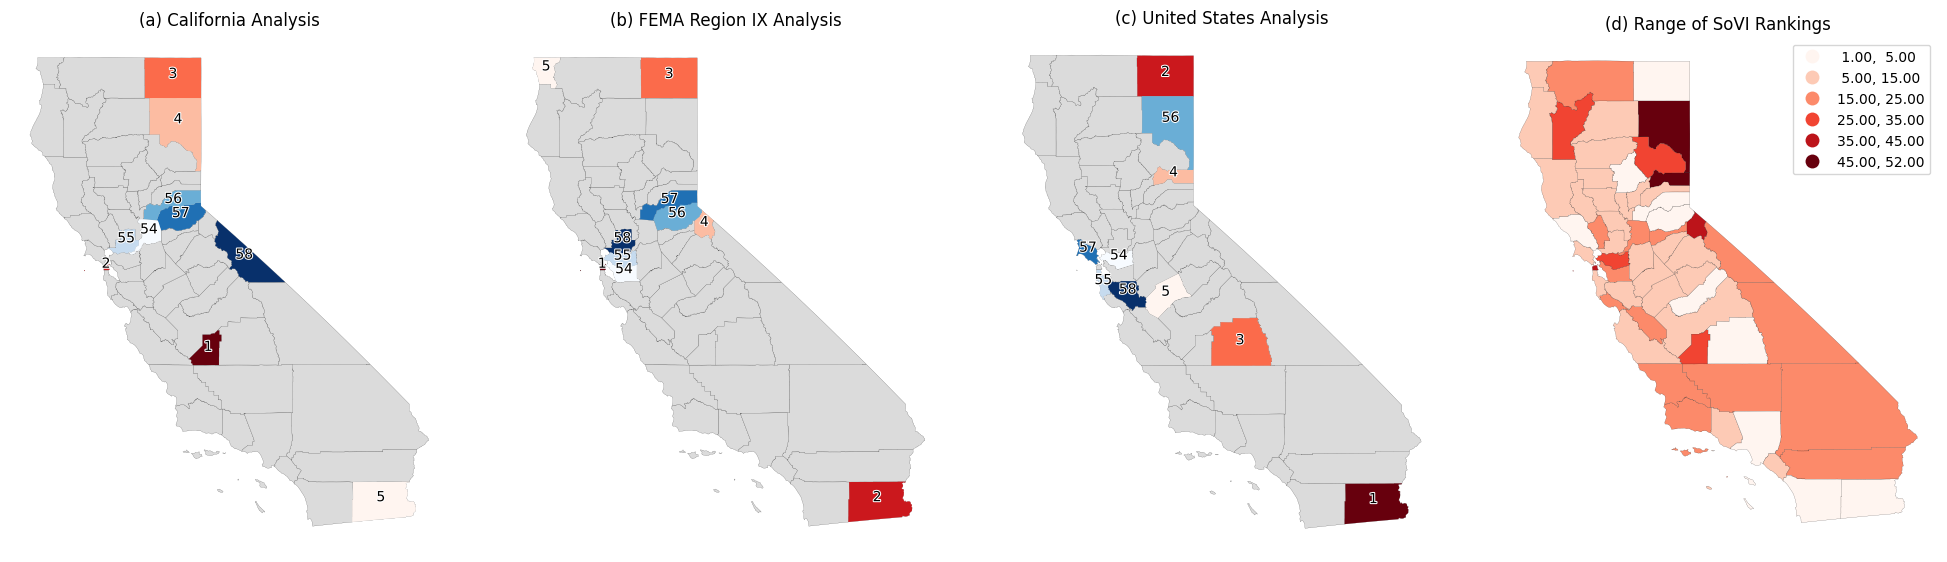

In [54]:
# Create overarching plot
fig, ax = plt.subplots(1, 4, figsize=(20, 8))

fig.tight_layout()

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off');

# Create CA rank map
top5_CA = counties_CA.loc[counties_CA["rank_CA"] < 6]
bottom5_CA = counties_CA.loc[counties_CA["rank_CA"] > 53]
ax[0].set_title("(a) California Analysis")
counties_CA.plot(ax = ax[0], cmap = mycolor, edgecolor = 'black', linewidth = .1)
top5_CA.plot(ax = ax[0], column = "rank_CA", cmap = "Reds_r")
top5_CA.apply(lambda x: ax[0].text(s=round(x['rank_CA']), color = 'black', x=x.geometry.centroid.coords[0][0], y=x.geometry.centroid.coords[0][1], ha='center', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")]), axis=1, );
bottom5_CA.plot(ax = ax[0], column = "rank_CA", cmap = "Blues");
bottom5_CA.apply(lambda x: ax[0].text(s=round(x['rank_CA']), color = 'black', x=x.geometry.centroid.coords[0][0], y=x.geometry.centroid.coords[0][1], ha='center',  path_effects=[pe.withStroke(linewidth=1.5, foreground="white")]), axis=1, );
# Create FEMA rank map
top5_CA = counties_CA.loc[counties_CA["rank_FEMA"] < 6]
bottom5_CA = counties_CA.loc[counties_CA["rank_FEMA"] > 53]
ax[1].set_title("(b) FEMA Region IX Analysis")
counties_CA.plot(ax = ax[1], cmap = mycolor, edgecolor = 'black', linewidth = .1)
top5_CA.plot(ax = ax[1], column = "rank_FEMA", cmap = "Reds_r")
top5_CA.apply(lambda x: ax[1].text(s=round(x['rank_FEMA']), color = 'black', x=x.geometry.centroid.coords[0][0], y=x.geometry.centroid.coords[0][1], ha='center', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")]), axis=1, );
bottom5_CA.plot(ax = ax[1], column = "rank_FEMA", cmap = "Blues");
bottom5_CA.apply(lambda x: ax[1].text(s=round(x['rank_FEMA']), color = 'black', x=x.geometry.centroid.coords[0][0], y=x.geometry.centroid.coords[0][1], ha='center',  path_effects=[pe.withStroke(linewidth=1.5, foreground="white")]), axis=1, );
# Create USA rank map
top5_CA = counties_CA.loc[counties_CA["rank_USA"] < 6]
bottom5_CA = counties_CA.loc[counties_CA["rank_USA"] > 53]
ax[2].set_title("(c) United States Analysis")
counties_CA.plot(ax = ax[2], cmap = mycolor, edgecolor = 'black', linewidth = .1)
top5_CA.plot(ax = ax[2], column = "rank_USA", cmap = "Reds_r")
top5_CA.apply(lambda x: ax[2].text(s=round(x['rank_USA']), color = 'black', x=x.geometry.centroid.coords[0][0], y=x.geometry.centroid.coords[0][1], ha='center', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")]), axis=1, );
bottom5_CA.plot(ax = ax[2], column = "rank_USA", cmap = "Blues");
bottom5_CA.apply(lambda x: ax[2].text(s=round(x['rank_USA']), color = 'black', x=x.geometry.centroid.coords[0][0], y=x.geometry.centroid.coords[0][1], ha='center',  path_effects=[pe.withStroke(linewidth=1.5, foreground="white")]), axis=1, );
# Create range rank map
ax[3].set_title("(d) Range of SoVI Rankings")
counties_CA["min_rank"] = counties_CA[["rank_USA", "rank_FEMA", "rank_CA"]].min(axis = 1)
counties_CA["max_rank"] = counties_CA[["rank_USA", "rank_FEMA", "rank_CA"]].max(axis = 1)
counties_CA["range_rank"] = counties_CA["max_rank"] - counties_CA["min_rank"]
counties_CA.plot(ax = ax[3], column = "range_rank", cmap = "Reds", edgecolor = 'black', linewidth = .1, scheme="User_Defined", 
         legend=True, classification_kwds=dict(bins=[5,15,25,35,45]));
plt.savefig( here(path["rfig"], 'fig1_weighted.png') ) # Save image

This figure looks almost the same as Spielman et al.'s. In (a), rank 3 is in a different place; in (b), rank 4 and rank 5 have switched places, but otherwise everything looks good. Our FEMA and state SoVI score data perfectly matched Spielman et al.'s output, so we are not sure what caused these differences.

#### Table 2

In [55]:
# Read in data
table2 = pd.read_csv( here(path["ddpub"], "state_fema_us_rank_correlations_Weighted.csv") )

# Formatting table
table2.index = table2["Unnamed: 0"]
table2 = table2.drop(columns = ["Unnamed: 0"])
table2["FEMA Region"] = ["I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX", "X"]
table2["All US counties input file versus all counties in a state input file"] = table2["spearman_r_st_us"].round(2)
table2["All counties in a FEMA region versus counties in a state within the FEMA region input file"] = table2["spearman_r_st_fema"].round(2)
table2["State used for comparison"] = ["Composite of ME, NH, MA", "NY", "VA", "GA", "IL", "TX", "MO", "SD", "CA", "ID"]
table2 = table2.transpose().rename_axis('FEMA Region', axis='columns')
table2 = table2.rename(columns=table2.iloc[4])
table2 = table2.drop(labels = ["FEMA Region", "spearman_r_st_fema", "spearman_r_st_us"], axis = 0)

In [56]:
if (table2.loc["pvalue_st_fema"] < 0.01).sum() == 10 and (table2.loc["pvalue_st_us"] < 0.01).sum() == 10:
    table2 = table2.drop(["pvalue_st_fema", "pvalue_st_us"])
    print("p < 0.01 for all values")
else:
    print("Different result than in paper")
    

p < 0.01 for all values


In [57]:
table2

FEMA Region,I,II,III,IV,V,VI,VII,VIII,IX,X
All US counties input file versus all counties in a state input file,0.73,0.74,0.67,0.5,0.51,0.62,0.9,0.59,0.48,0.65
All counties in a FEMA region versus counties in a state within the FEMA region input file,0.9,0.58,0.89,0.8,0.36,0.68,0.8,0.85,0.69,0.82
State used for comparison,"Composite of ME, NH, MA",NY,VA,GA,IL,TX,MO,SD,CA,ID


All of these numbers match up with those in Spielman et al.'s paper except for one, which is reported as 0.65 in their paper rather as opposed to a 0.68 in our work. Since we checked that our data matches their provided output data, they likely made a simple typo when typing up their work for publication.

In [58]:
# Save file
table2.to_csv( here(path["rtab"],"table2_weighted.csv") )

### RPr-H3

Finally, we tested RPr-H3, that reproduced direction reversals and min, average, and max SoVI rank value of 28 demographic variables are not identical to the direction reversals and min, average, and max SoVI rank values shown in figure 2 of the original study.

#### Figure 2

In [59]:
summary_stats

,National Model,Reversals,Min,Average,Max,Range
QAGEDEP_ACS,+,0,1.0,9.52,24.0,23.0
QFEMALE_ACS,+,6,1.0,11.33,28.0,27.0
QSSBEN,+,0,1.0,10.33,21.0,20.0
QHISP_ACS,+,3,1.0,11.10,28.0,27.0
QPOVTY,+,0,1.0,9.81,27.0,26.0
QED12LES_ALT,+,2,2.0,10.38,28.0,26.0
QSERV_ALT,+,2,1.0,13.19,26.0,25.0
- PERCAP_ALT,+,2,6.0,15.57,23.0,17.0
QESL_ALT,+,4,1.0,11.43,27.0,26.0
- QFAM,+,0,1.0,11.33,28.0,27.0


In [60]:
# Save file
summary_stats.to_csv( here(path["rtab"],"fig2_weighted.csv") )

As mentioned in the analysis, we eliminated the "expected" column and added minus signs to the variable labels where needed to make the figure more interpretable. 
The "original" column matches Spielman et al.'s exactly, but the "reversals" column has 2 minor differences: specifically, in Spielman et al.'s paper, QNOAUTO_ALT has 1 reversal instead of 0 and QEXTRCT_ALT has 7 reversals instead of 6. 
These are pretty minor differences. Because our variable_contributions dataset matches Spielman et al.'s data perfectly, our best guess is that the differences are due to transciption errors when they constructed their figure.

Spielman et al. do not provide exact values for our last 4 columns, but everything looks accurate when we compare our numbers to their figure.

## Discussion

The goal of this study was to computationally reproduce Spielman et al.'s "Evaluating social vulnerability indicators: criteria and their application to the Social Vulnerability Index" (Spielman et al., 2020). 
To their credit, Spielman et al. provided their code, data, and metadata in their [sovi-validity GitHub repository](https://github.com/geoss/sovi-validity), making their analysis transparent, accessible, and reproducible in a manner that is rare in the field of geography.

We have rejected RPr-H1, finding that our reproductions of each of 21 SoVI models were identical to the original results, with the possible exception of a few minor changes in county rank caused by very slightly different calculations of land area and population density.
The implication of this finding is that the codified procedures used in this reproduction study can reliably reproduce and replicate the SoVI model.
Given our rejection of RPr-H1, we were surprised to have difficulty exactly reproducing RPr-H2 and RPr-H3.
Although our results were very similar to figure 1 and figure 2, we did find a few discrepancies in each figure which we can only assume are related to the data visualization process in the original study, which was not automated in code.


In addition to checking the original study results, a major aim of this reproduction study was to improve its computational reproducibility.
With all the necessary data and code in one GitHub repository, we assumed that the computational reproduction would be trivial. 
However, even with all of the resources they provided, we still spent a month of full-time work on this project before successfully reproducing their results. 
Our experiences working with this data motivated us to publish this report, so that we can share the obstacles that made the reproduction process so time-intensive and point out methods that researchers can employ to enhance the reproducibility of their work.

The main obstacles that stood in the way of reproducing Spielman et al.'s results were:
1. Outdated packages
2. Extraneous data and code
3. A confusing file system
4. Incomplete code
5. Our own edits

#### Outdated packages

The first obstacle, and one that we anticipated because much of Spielman et al.'s code was written 6 or 7 years ago, was the presence of outdated packages. 
When working with code developed on outdated packages, one has the option of adjusting their package versions or adapting your code to run on current package versions. 
We opted for the latter because we found no documentation regarding the package versions used by Spielman et al., and we hope to use our code in the future for a replication study, preferably operating on an up-to-date software environment.

One notable package issue occurred because Spielman et al. wrote their code before the [refactoring of PySAL](https://github.com/pysal/pysal/wiki/PEP-13:-Refactor-PySAL-Using-Submodules) into several submodules that occured with the release of [PySAL 2.0.0](https://pypi.org/project/pysal/2.0.0/) in 2019.
In Spielman et al.'s work, functions for calculating contiguity-based spatial weights were included in the PySAL package, but after the refactoring, this feature is included in the libpysal package.
Without prior familiarity with the intricacies of PySAL's updates over the years, it took us some time to locate equivalent functions in the updated package.
Changes to PySAL were perhaps the most time-consuming package update issue, but there were other smaller issues along the way, such as [Pandas's deprecation of the `.ix` indexer](https://pandas.pydata.org/pandas-docs/version/0.20/whatsnew.html) in favor of `.iloc` and `.loc`.
Most edits due to package updates were small, but they all took some time to figure out, time that adds up.

Researchers can eliminate this obstacle to reproducibility by containerizing their work.
For this study in particular, we found that providing a list of required packages and their versions in a text file was sufficient to reconstruct the environment on another machine.

#### Extraneous data and code

Another issue that required a substantial amount of effort to overcome was the presence of extraneous data and code.
For example, although Spielman et al.'s paper only mentions 5-year ACS data from 2012, in their `data_prep.py` file, they also import and manipulate decennial census variables.
Unfortunately, they do not comment their code well-enough for other researchers to understand why they do this without combing through every line of code.
After some close inspection, we found that all of the decennial variables except for land area are not used to generate their results, allowing us to discard unused data and a substantial amount of code.
In their `data_prep.py` code, Spielman et al. also include some analysis of standard errors that we eventually discovered to be unnecessary.

Several other files in Spielman et al.'s code folder also include extraneous code. 
In particular, the entire contents of the `drop1_place.py`, `spearman.py`, and `visualization.py`, as well as portions of `compute_sovis.py` implementing a drop1 analysis turned out to be unnecessary to generate the results they describe in their paper.
It seems that Spielman et al. were considering several possible directions of research, and they left their dead ends in their code.
We omit all of the unnecessary steps in our report, reducing the computational intensity of the analysis and making our work easier to follow.

While the presence of unnecessary code may not have bothered the original authors of the paper, in the absence of comments explaining their purpose, extra code makes it far more difficult for an independent party to understand their work.
If one does not quickly realize which parts of the code are actually necessary, they may spend time debugging code just to discard it later on, as we did.
Researchers can make it much easier for others to reproduce their work by publishing a clean version of their code with informative comments and no extraneous work.

#### Confusing file system

From our experience working with Spielman et al.'s repository, we find that an index or some metadata regarding the structure of code and data would be beneficial.

The code for Spielman et al.'s analysis was originally divided into 6 different python scripts:
- `data_prep.py`
- `spss_pca.py`
- `drop1_place.py`
- `compute_sovis.py`
- `spearman.py`
- `visualization.py`

While one could infer the order of the scripts from the file names, file contents, and whether a file called any other files, that process took a fair amount of work and left room for error.
When one script calls another script which calls another script, it can become difficult to locate the source of an error.
Had the researchers provided an index explaining the purpose of each script and how they work together, like our `procedure_metadata.csv`, that would have reduced the confusion of working with multiple scripts and prevented us from even attempting to debug unnecessary scripts.
Similarly, had the authors provided a quick summary of each of their data files, like our `data_metadata.csv`, then we would have quickly understood the purpose of each data source, instead of guessing at each's purpose based on its name and the code that manipulates it.
Generally, the more information a researcher can provide about their data and code upfront, the less time other researchers will need to spend deciphering their files during a reproduction.

#### Incomplete code

While Spielman et al. provide all of the code required to reproduce their data files, they do not provide any code for reproducing their figures.
By providing their code, data, and metadata in a GitHub repository, they are on the leading edge of reproducibility in geography.
However, they could further improve reproducibility by including code to generate their figures.
As noted in the results section, the output data files produced by our analysis and provided by Spielman et al. were identical, yet our figures exhibited slight differences.
Had Spielman et al. provided code to produce their figures, it would be absolutely clear whether the differences between our figures were due to typos or a difference in code; and if the differences were typos, then producing their figures with code working directly from their data may have eliminated that issue altogether.

#### Our own edits

The other major time sink occurred because of our own edits.
Spielman et al. provided data and metadata for reproducing their results; assuming that they acquired their data appropriately, this should be sufficient for a reproduction.
However, our end-goal with this project is to produce a replication study that will potentially involve census data from multiple years.
To facilitate the acquisition of analogous data in several different time periods, it is helpful to automate the process rather than manually downloading a large number of files.
For this reason, we used the python package, [pygris](https://walker-data.com/pygris/), to acquire our data directly from the census via an API.
Learning to use pygris and checking that our data sufficiently matches Spielman et al.'s data was a lengthy but worthy process, as it improves reproducibility and will be useful for our future work.

## Conclusions

While there are ways that Spielman et al. could make it easier to reproduce their work, we were able to sufficiently reproduce every relevant output dataset.
We find that their results to be legitimate, highlighting issues of internal and theoretical consistency with SoVI.

Our main takeaway from reproducing Spielman et al.'s work is that merely providing one's code, data, and metadata is insufficient for allowing other researchers to quickly reproduce one's results.
In particular, containerizing their software environment, cleaning their code and omitting extraneous information, providing some metadata regarding the structure of their code and data files, and including code for every step of the analysis from data acquisition to figure production would all enhance the reproducibility of their work.
Spielman et al. produced a well-designed study in a reproducible repository, but a more carefully designed and fully executable research compendium would reduce the risk of transcription errors and allow researchers to reproduce their results in a more reasonable time frame.

## References
- Cutter, S. L., Boruff, B. J., & Shirley, W. L. (2003). Social Vulnerability to Environmental Hazards. Social Science Quarterly, 84(2), 242–261. https://doi.org/10.1111/1540-6237.8402002
- Rey, S. J., & Anselin, L. (2007). PySAL: A Python Library of Spatial Analytical Methods. Review of Regional Studies, 37(1). https://doi.org/10.52324/001c.8285
- Spielman, S. E., Tuccillo, J., Folch, D. C., Schweikert, A., Davies, R., Wood, N., & Tate, E. (2020). Evaluating Social Vulnerability Indicators: Criteria and their Application to the Social Vulnerability Index. Natural Hazards, 100(1), 417–436. https://doi.org/10.1007/s11069-019-03820-z

## Funding
- `Funding Name`: NSF Directorate for Social, Behavioral and Economic Sciences
- `Funding Title`: Transforming theory-building and STEM education through reproductions and replications in the geographical sciences
- `Award info URI`: https://www.nsf.gov/awardsearch/showAward?AWD_ID=2049837
- `Award number`: BCS-2049837